# Part 17 

## # Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib notebook

In [2]:
df = pd.read_csv('../datasets/wines.csv')
df.shape, df.columns

((178, 14),
 Index(['Class', 'Alcohol', 'Malic acid', ' Ash', ' Alcalinity of ash',
        'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
        'Proanthocyanins', 'Color intensity', 'Hue',
        'OD280/OD315 of diluted wines', 'Proline'],
       dtype='object'))

In [3]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from utils.utils import _value_counts, _describe, _isnull

In [5]:
_isnull(df)

>> Null registers:

# Class: 0 null rows
# Alcohol: 0 null rows
# Malic acid: 0 null rows
#  Ash: 0 null rows
#  Alcalinity of ash: 0 null rows
# Magnesium: 0 null rows
# Total phenols: 0 null rows
# Flavanoids: 0 null rows
# Nonflavanoid phenols: 0 null rows
# Proanthocyanins: 0 null rows
# Color intensity: 0 null rows
# Hue: 0 null rows
# OD280/OD315 of diluted wines: 0 null rows
# Proline: 0 null rows


In [6]:
_describe(df)

>> Describe columns:

# Class:
count    178.000000
mean       1.938202
std        0.775035
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Class, dtype: float64


# Alcohol:
count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: Alcohol, dtype: float64


# Malic acid:
count    178.000000
mean       2.336348
std        1.117146
min        0.740000
25%        1.602500
50%        1.865000
75%        3.082500
max        5.800000
Name: Malic acid, dtype: float64


#  Ash:
count    178.000000
mean       2.366517
std        0.274344
min        1.360000
25%        2.210000
50%        2.360000
75%        2.557500
max        3.230000
Name:  Ash, dtype: float64


#  Alcalinity of ash:
count    178.000000
mean      19.494944
std        3.339564
min       10.600000
25%       17.200000
50%       19.500000
75%       21.500000
max     

In [7]:
_value_counts(df)

>> Value counts:

# Class:
2    71
1    59
3    48
Name: Class, dtype: int64


# Alcohol:
12.37    6
13.05    6
12.08    5
12.29    4
12.00    3
        ..
13.34    1
13.69    1
13.90    1
13.84    1
13.75    1
Name: Alcohol, Length: 126, dtype: int64


# Malic acid:
1.73    7
1.81    4
1.67    4
1.68    3
1.61    3
       ..
3.45    1
2.51    1
4.61    1
3.83    1
2.68    1
Name: Malic acid, Length: 133, dtype: int64


#  Ash:
2.30    7
2.28    7
2.70    6
2.36    6
2.32    6
       ..
2.16    1
2.78    1
2.53    1
1.71    1
1.95    1
Name:  Ash, Length: 79, dtype: int64


#  Alcalinity of ash:
20.0    15
21.0    11
16.0    11
18.0    10
19.0     9
        ..
19.4     1
11.2     1
21.6     1
18.1     1
14.8     1
Name:  Alcalinity of ash, Length: 63, dtype: int64


# Magnesium:
88     13
86     11
101     9
98      9
96      8
102     7
112     6
94      6
85      6
97      5
80      5
92      5
103     5
89      5
90      4
108     4
107     4
106     4
120     3
118     3
116     3


In [8]:
# pairplot = sns.pairplot(df)
# pairplot.savefig('sess_17-pairplot')

In [9]:
df.shape

(178, 14)

In [10]:
x = df.drop(labels='Class', axis=1)
x.shape

(178, 13)

In [55]:
y = df['Class']
y.shape

(178,)

## # Model

## ## Self organizing map (SOM)

In [12]:
from math import sqrt

In [13]:
_xy = int(sqrt(int(5*sqrt(int(x.shape[0])))))
_xy

8

In [14]:
from minisom import MiniSom

In [15]:
som = MiniSom(x=_xy, y=_xy, input_len=x.shape[1], sigma=1.0, random_seed=42)
# the method does not generalize for DataFrames, thus we pass df.values
som.random_weights_init(x.values)
# num_iteration == epochs
som.train_random(data=x.values, num_iteration=100)

In [16]:
som._weights.shape

(8, 8, 13)

In [17]:
som._activation_map.shape

(8, 8)

In [18]:
# take a look at how many each output neuron was chosen as a BMU
som.activation_response(x.values)

array([[26.,  6.,  1.,  6.,  6.,  0.,  1.,  2.],
       [ 5., 12.,  9.,  2.,  2.,  1.,  1.,  2.],
       [ 8.,  1.,  4.,  4.,  2.,  5.,  1.,  3.],
       [ 7.,  4.,  0.,  0.,  2.,  1.,  1.,  1.],
       [ 0.,  1.,  0.,  1.,  3.,  6.,  1.,  1.],
       [ 0.,  0.,  2.,  0.,  2.,  0.,  0.,  1.],
       [ 3.,  1.,  0.,  2.,  5.,  3.,  1.,  0.],
       [ 1.,  0.,  5.,  6.,  1.,  1.,  2.,  3.]])

In [19]:
som.distance_map().T

array([[0.1304559 , 0.17046857, 0.26276729, 0.4585727 , 0.3392369 ,
        0.29522983, 0.55709845, 0.46406943],
       [0.18697556, 0.33820004, 0.51534471, 0.78682751, 0.62447159,
        0.70847943, 1.        , 0.76912854],
       [0.22762999, 0.39567981, 0.64775249, 0.86681909, 0.71878996,
        0.63913113, 0.8330346 , 0.55264073],
       [0.19573083, 0.3345105 , 0.67961602, 0.80305793, 0.49856658,
        0.50490091, 0.58283076, 0.43658684],
       [0.13967254, 0.40259171, 0.68239153, 0.59417401, 0.3513343 ,
        0.46189511, 0.54764528, 0.27709118],
       [0.12513068, 0.31539584, 0.5875151 , 0.45301713, 0.3570665 ,
        0.49855072, 0.74520593, 0.47578065],
       [0.07272332, 0.26193463, 0.35566506, 0.45559797, 0.37221495,
        0.54215674, 0.60320007, 0.62403203],
       [0.05354416, 0.14416305, 0.1708382 , 0.18347346, 0.43279616,
        0.34472073, 0.55026825, 0.3769055 ]])

In [83]:
from pylab import pcolor, colorbar, plot

<IPython.core.display.Javascript object>


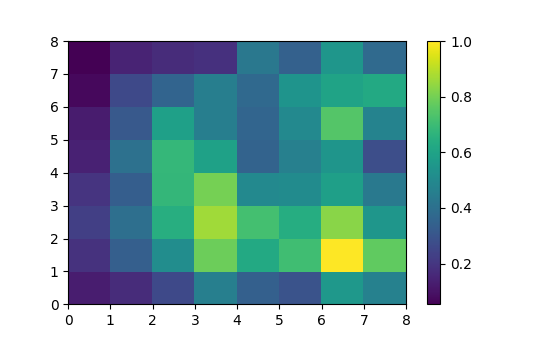

In [21]:
pcolor(som.distance_map().T)
colorbar()

### ## Evaluation

In [22]:
w = som.winner(x.values[1]) # outputs the BMU coordinates for a given input
w

(4, 5)

In [43]:
markers = ['o', 's', 'D']
colors = ['r', 'g', 'b']

In [60]:
_d = {1:0, 2:1, 3:2 }
y = y.apply(lambda x: _d[x])

In [74]:
x.shape, y.shape

((178, 13), (178,))

<IPython.core.display.Javascript object>


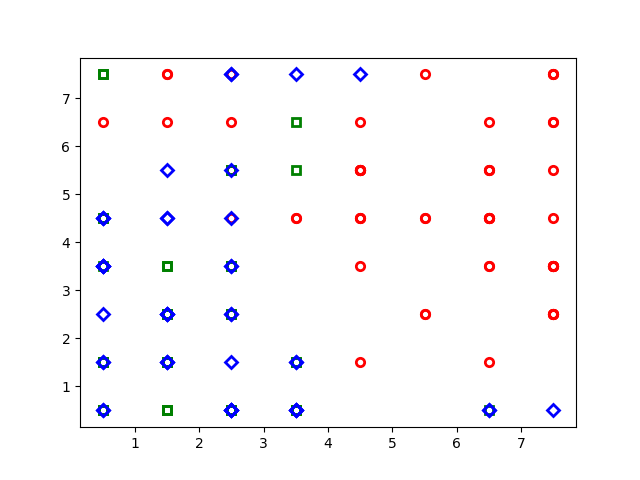

In [89]:
for i in range(x.shape[0]):
    w = som.winner(x.values[i])
    bmu = y[i]
    plot(w[0] + 0.5, w[1] + 0.5,
         markers[bmu], markerfacecolor='None', markeredgecolor=colors[bmu], markeredgewidth=2)

## ## K-means Clustering

In [23]:
from sklearn.cluster import KMeans

In [38]:
# kmc = KMeans(random_state=42)
kmc = KMeans(n_clusters=len(set(y)), random_state=42)

In [39]:
kmc.fit(x)

KMeans(n_clusters=3, random_state=42)

In [40]:
len(kmc.labels_), kmc.labels_

(178,
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
        2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
        0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
        2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
        2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
        0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
        0, 2], dtype=int32))

## ## KNN

In [27]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)

xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((133, 13), (133,), (45, 13), (45,))

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=5, p=2)

In [31]:
knn.fit(X=xtrain, y=ytrain)

KNeighborsClassifier()

### ## Evaluation

In [32]:
pred = knn.predict(xtest)

In [33]:
_ = classification_report(y_true=ytest, y_pred=pred)
print(_)

              precision    recall  f1-score   support

           1       0.87      0.87      0.87        15
           2       0.72      0.72      0.72        18
           3       0.50      0.50      0.50        12

    accuracy                           0.71        45
   macro avg       0.70      0.70      0.70        45
weighted avg       0.71      0.71      0.71        45

